In [1]:
!pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes

In [7]:
import keras,os
import numpy as np
import tensorflow as tf
#import cv2
from keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.models import Sequential , load_model , Model
#from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
#from keras.utils import np_utils
#from tensorflow.keras import applications
#from tensorflow.keras import optimizers
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_ds='/content/drive/MyDrive/Data_100/traing'
val_ds='/content/drive/MyDrive/Data_100/validation'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation data
train_data_dir = train_datagen.flow_from_directory(
    train_ds,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'  # for 10 classes, we use categorical
)

validation_dir = val_datagen.flow_from_directory(
    val_ds,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)


Found 833 images belonging to 10 classes.
Found 107 images belonging to 10 classes.


In [8]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Extract the output of the base model
x = base_model.output

# First custom convolutional block
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Second custom convolutional block
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Global Average Pooling layer
x = GlobalAveragePooling2D()(x)

# Dropout layer
x = Dropout(0.5)(x)

# Output layer with 10 classes (for your classification task)
predictions = Dense(10, activation='softmax')(x)

# Define the model by specifying inputs and outputs
model = Model(inputs=base_model.input, outputs=predictions)


In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=0.001),
              metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_95 (Conv2D)          (None, 149, 149, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 149, 149, 32)         96        ['conv2d_95[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 149, 149, 32)         0         ['batch_normalization_94[0

In [10]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
epochs = 100

In [ ]:
history = model.fit(
    train_data_dir,
    validation_data = validation_dir,
    epochs = epochs,
    batch_size = 32,

    )


Epoch 1/100
27/27 [==============================] - 597s 21s/step - loss: 2.2196 - accuracy: 0.1957 - val_loss: 1.9374 - val_accuracy: 0.2710
Epoch 2/100
27/27 [==============================] - 30s 1s/step - loss: 1.4857 - accuracy: 0.5462 - val_loss: 1.4310 - val_accuracy: 0.5047
Epoch 3/100
27/27 [==============================] - 30s 1s/step - loss: 0.9458 - accuracy: 0.7323 - val_loss: 1.1045 - val_accuracy: 0.5794
Epoch 4/100
27/27 [==============================] - 30s 1s/step - loss: 0.6323 - accuracy: 0.8127 - val_loss: 0.8904 - val_accuracy: 0.7009
Epoch 5/100
27/27 [==============================] - 30s 1s/step - loss: 0.4723 - accuracy: 0.8752 - val_loss: 0.6547 - val_accuracy: 0.7664
Epoch 6/100
27/27 [==============================] - 30s 1s/step - loss: 0.3246 - accuracy: 0.9136 - val_loss: 0.8034 - val_accuracy: 0.7477
Epoch 7/100
27/27 [==============================] - 30s 1s/step - loss: 0.2653 - accuracy: 0.9280 - val_loss: 0.4724 - val_accuracy: 0.8411
Epoch 8/100

In [ ]:
from tensorflow.keras.models import load_model
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
history.history['loss'][:]

[2.219553232192993,
 1.485703706741333,
 0.9458014965057373,
 0.632270872592926,
 0.472286581993103,
 0.3246145248413086,
 0.26533496379852295,
 0.22812944650650024,
 0.15945132076740265,
 0.13705585896968842,
 0.13058750331401825,
 0.1274251788854599,
 0.11152811348438263,
 0.08873816579580307,
 0.06529829651117325,
 0.06043410673737526,
 0.09466661512851715,
 0.08430621773004532,
 0.06450066715478897,
 0.061865709722042084,
 0.053876183927059174,
 0.05138660967350006,
 0.05361928045749664,
 0.06337606906890869,
 0.04789717495441437,
 0.030108800157904625,
 0.046274468302726746,
 0.04706986993551254,
 0.034282393753528595,
 0.0354577861726284,
 0.021493123844265938,
 0.044776998460292816,
 0.035723209381103516,
 0.04314172640442848,
 0.025824453681707382,
 0.03227096050977707,
 0.03751938045024872,
 0.01836519129574299,
 0.01819198951125145,
 0.023230424150824547,
 0.044579990208148956,
 0.02028985507786274,
 0.02547585591673851,
 0.013396985828876495,
 0.03184865042567253,
 0.0195130

In [ ]:
history.history['accuracy'][:]

[0.19567826390266418,
 0.5462185144424438,
 0.732292890548706,
 0.8127250671386719,
 0.8751500844955444,
 0.9135653972625732,
 0.9279711842536926,
 0.9399759769439697,
 0.9675870537757874,
 0.9651860594749451,
 0.9651860594749451,
 0.971188485622406,
 0.971188485622406,
 0.9747899174690247,
 0.9843937754631042,
 0.989195704460144,
 0.9795918464660645,
 0.9723889827728271,
 0.989195704460144,
 0.9855942130088806,
 0.9843937754631042,
 0.989195704460144,
 0.9879952073097229,
 0.9807923436164856,
 0.9879952073097229,
 0.9939975738525391,
 0.9879952073097229,
 0.9879952073097229,
 0.989195704460144,
 0.9915966391563416,
 0.9975990653038025,
 0.981992781162262,
 0.9939975738525391,
 0.9867947101593018,
 0.9939975738525391,
 0.9963985681533813,
 0.9915966391563416,
 0.9963985681533813,
 0.9975990653038025,
 0.9951980710029602,
 0.9855942130088806,
 0.9939975738525391,
 0.9951980710029602,
 0.9975990653038025,
 0.9939975738525391,
 0.9975990653038025,
 0.9951980710029602,
 0.9963985681533813,

In [ ]:
history.history['val_loss'][:]

[1.9374369382858276,
 1.430956244468689,
 1.1044914722442627,
 0.8904427289962769,
 0.6546551585197449,
 0.8034469485282898,
 0.4724010229110718,
 0.3502270579338074,
 0.39690101146698,
 0.5251755714416504,
 0.33327969908714294,
 0.3541092574596405,
 0.3254922926425934,
 0.2877652645111084,
 0.27221742272377014,
 0.25845983624458313,
 0.4209616780281067,
 0.20015765726566315,
 0.21344059705734253,
 0.24739980697631836,
 0.23246334493160248,
 0.1687307059764862,
 0.20189568400382996,
 0.2325592339038849,
 0.2414151281118393,
 0.21613194048404694,
 0.2580857574939728,
 0.23561586439609528,
 0.1598760187625885,
 0.2077215611934662,
 0.18901287019252777,
 0.18598738312721252,
 0.1897200644016266,
 0.16331475973129272,
 0.18164950609207153,
 0.12944594025611877,
 0.1661713570356369,
 0.21672813594341278,
 0.1781006157398224,
 0.1776958405971527,
 0.2933885157108307,
 0.29608219861984253,
 0.28298938274383545,
 0.29597023129463196,
 0.1900559365749359,
 0.15986935794353485,
 0.14231979846954

In [ ]:
history.history['val_accuracy'][:]

[0.2710280418395996,
 0.5046728849411011,
 0.5794392228126526,
 0.7009345889091492,
 0.7663551568984985,
 0.7476635575294495,
 0.84112149477005,
 0.8971962332725525,
 0.8878504633903503,
 0.8504672646522522,
 0.8878504633903503,
 0.8878504633903503,
 0.9065420627593994,
 0.9252336621284485,
 0.9345794320106506,
 0.9345794320106506,
 0.8598130941390991,
 0.9719626307487488,
 0.9626168012619019,
 0.9252336621284485,
 0.9252336621284485,
 0.9439252614974976,
 0.9532710313796997,
 0.9252336621284485,
 0.9065420627593994,
 0.9345794320106506,
 0.9252336621284485,
 0.9252336621284485,
 0.9345794320106506,
 0.9345794320106506,
 0.9439252614974976,
 0.9345794320106506,
 0.9439252614974976,
 0.9532710313796997,
 0.9439252614974976,
 0.9532710313796997,
 0.9626168012619019,
 0.9252336621284485,
 0.9345794320106506,
 0.9345794320106506,
 0.9252336621284485,
 0.9345794320106506,
 0.9158878326416016,
 0.9065420627593994,
 0.9439252614974976,
 0.9626168012619019,
 0.9439252614974976,
 0.943925261497

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


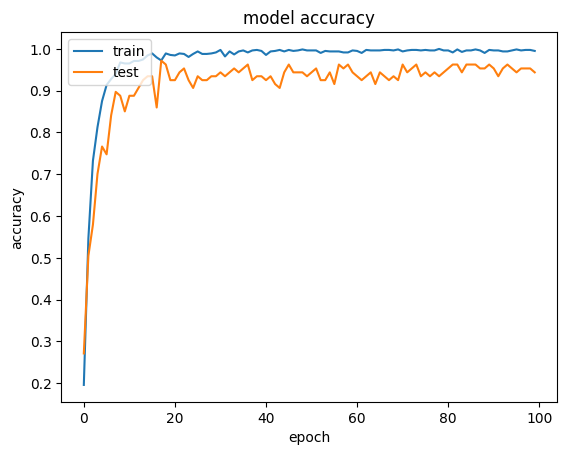

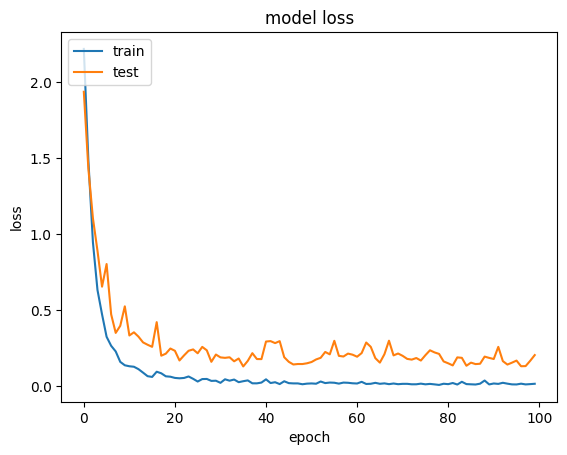

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [ ]:
test_path ='/content/drive/MyDrive/Data_100/testing'

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                                 target_size = (299,299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                            shuffle=False)

Found 107 images belonging to 10 classes.


In [ ]:
predicted_labels = model.predict(test_set)
predicted_labels = np.argmax(predicted_labels, axis=1)

4/4 [==============================] - 45s 15s/step


In [ ]:
predicted_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 6, 1, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 0, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8,
       8, 5, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [ ]:
true_labels=test_set.classes

In [ ]:
true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
      dtype=int32)

In [ ]:
scores=model.evaluate(test_set)

4/4 [==============================] - 1s 136ms/step - loss: 0.2613 - accuracy: 0.9346


In [ ]:
class_names = list(train_data_dir.class_indices.keys())
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

1/1 [==============================] - 0s 28ms/step
Predicted class index: 0
Predicted class name: Tomato_Bacterial_spot
Time taken for prediction: 0.1484 seconds


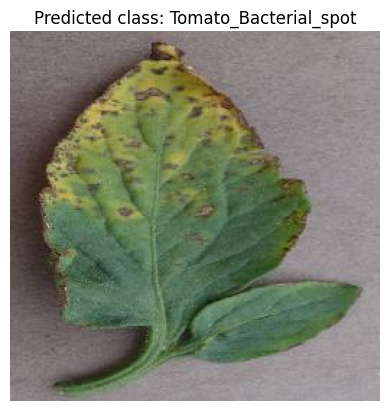

In [ ]:
import time
from tensorflow.keras.preprocessing import image

img_path = '/content/drive/MyDrive/Data_100/testing/Tomato_Bacterial_spot/1dbd6b67-25f1-444e-81d8-cbb54213cbb4___GCREC_Bact.Sp 3528.JPG'
img = image.load_img(img_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()
prediction_time = end_time - start_time
predicted_class_idx = np.argmax(predictions, axis=1)[0]
predicted_class_name = class_names[predicted_class_idx]
print(f"Predicted class index: {predicted_class_idx}")
print(f"Predicted class name: {predicted_class_name}")
print(f"Time taken for prediction: {prediction_time:.4f} seconds")
plt.imshow(image.load_img(img_path))
plt.title(f"Predicted class: {predicted_class}")
plt.axis('off')
plt.show()


In [ ]:
import tensorflow as tf
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:

def returnIndex(labels):
  for i in range(len(labels)):
      if(labels[i]==1):
        return i

1/1 [==============================] - 0s 25ms/step


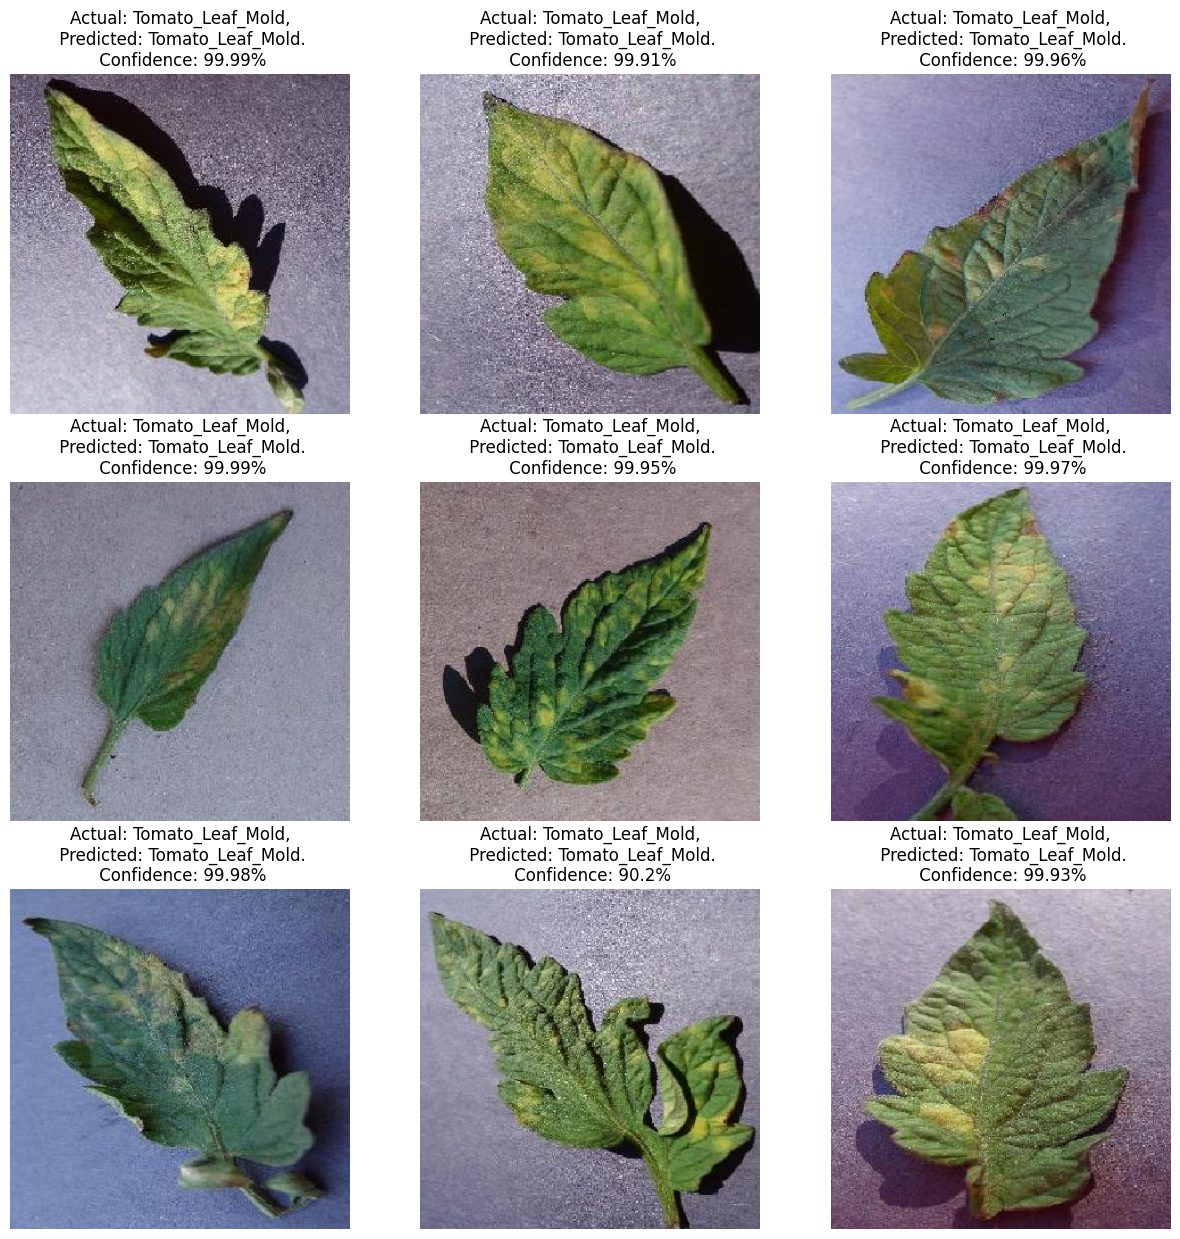

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[returnIndex(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

4/4 [==============================] - 1s 211ms/step
Confusion Matrix
Normalized confusion matrix
Classification Report
                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.71      1.00      0.83        10
                        Tomato_Early_blight       1.00      0.75      0.86         8
                         Tomato_Late_blight       1.00      0.92      0.96        12
                           Tomato_Leaf_Mold       0.94      1.00      0.97        16
                  Tomato_Septoria_leaf_spot       1.00      0.82      0.90        11
Tomato_Spider_mites_Two_spotted_spider_mite       0.88      1.00      0.93         7
                        Tomato__Target_Spot       0.89      1.00      0.94         8
      Tomato__Tomato_YellowLeaf__Curl_Virus       1.00      0.90      0.95        10
                Tomato__Tomato_mosaic_virus       1.00      0.93      0.97        15
                             

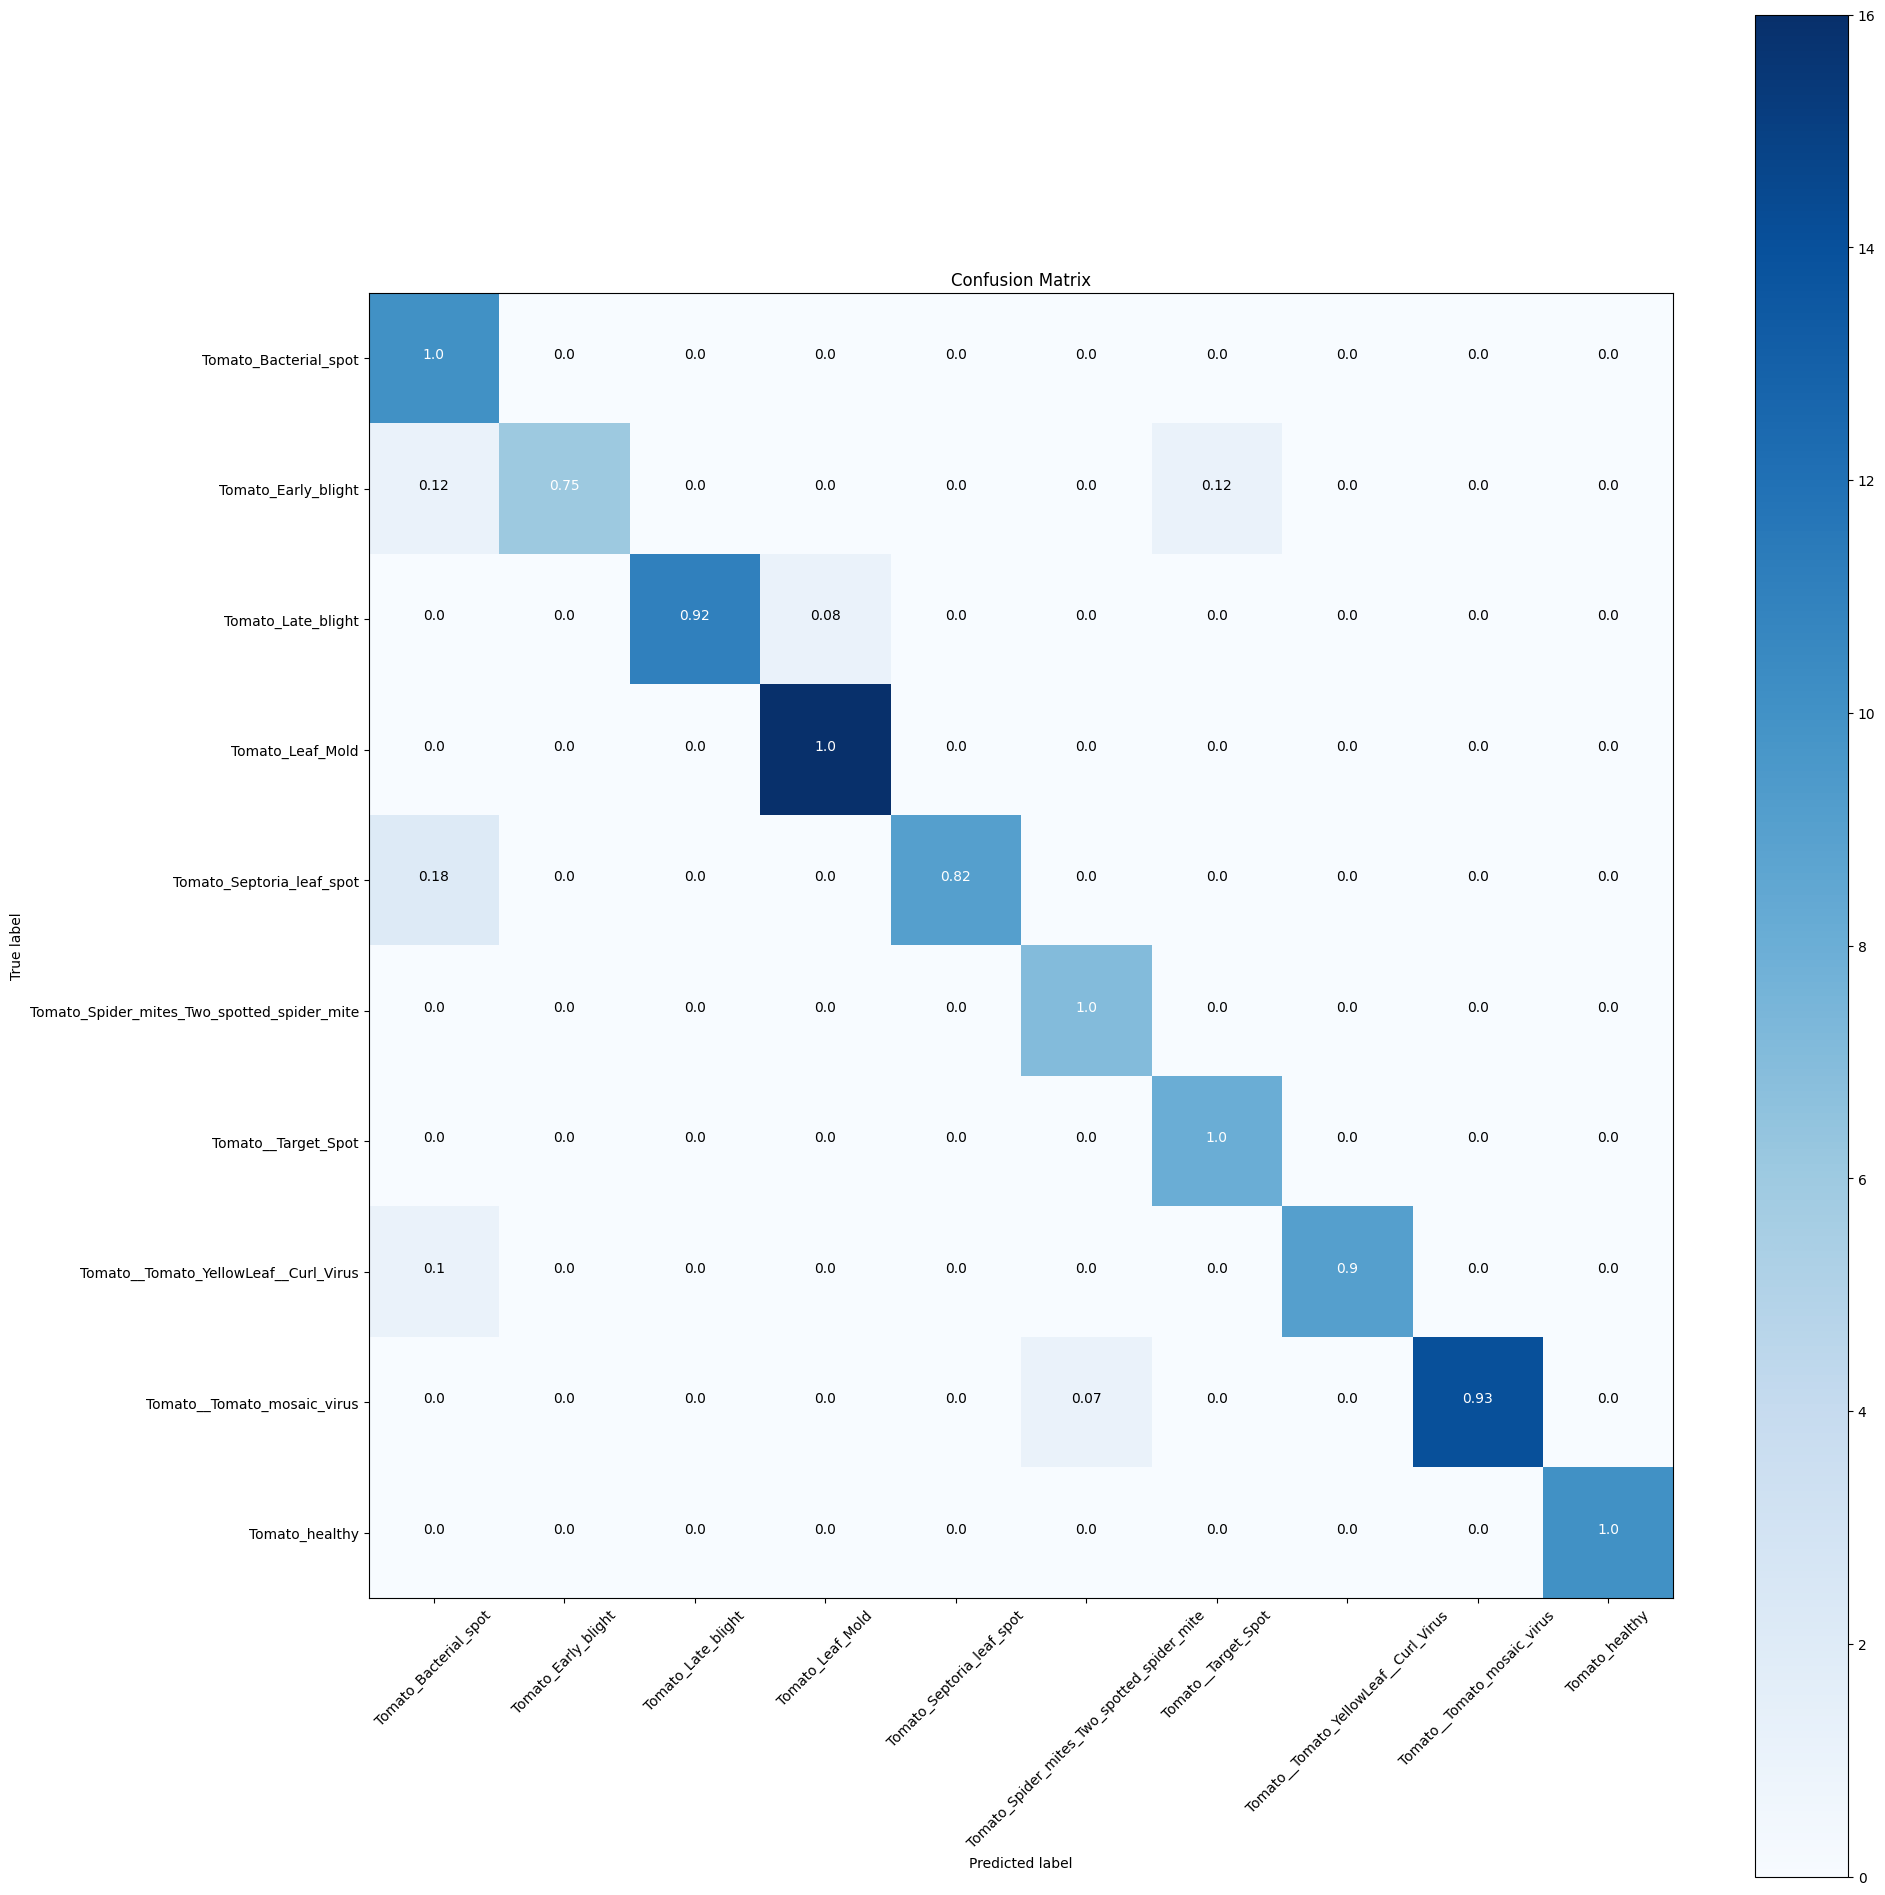

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools
#shuffle=False
target_names = []
for key in train_data_dir.class_indices:
    target_names.append(key)
# print(target_names)
#Confusion Matrix
Y_pred = model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_set.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names))

In [ ]:
import time
img_path = '/content/drive/MyDrive/Data_100/testing/Tomato_Bacterial_spot/1dbd6b67-25f1-444e-81d8-cbb54213cbb4___GCREC_Bact.Sp 3528.JPG'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()
prediction_time = end_time - start_time
predicted_class_idx = np.argmax(predictions, axis=1)[0]
predicted_class_name = class_names[predicted_class_idx]
print(f"Predicted class index: {predicted_class_idx}")
print(f"Predicted class name: {predicted_class_name}")
print(f"Time taken for prediction: {prediction_time:.4f} seconds")
plt.imshow(image.load_img(img_path))
plt.title(f"Predicted class: {predicted_class}")
plt.axis('off')
plt.show()


NameError: name 'image' is not defined